# Atividade 02

## Suavizar

In [9]:
img1 = Image.open("02.filtro/suavizar/Suavizar_(1).jpg")
img2 = Image.open("02.filtro/suavizar/Suavizar_(2).jpg")

## Suavizar Matriz [3,3]

In [10]:
def suavizar3(img, path):
  img_array = np.asarray(img)
  rows=len(img_array)
  cols= len(img_array[0])

  new_img = np.zeros([rows, cols])
  for i in range(1, rows-1):
      for j in range(1, cols-1):
          med = [img_array[i-1, j-1],
                 img_array[i-1, j],
                 img_array[i-1, j + 1],
                 img_array[i, j-1],
                 img_array[i, j],
                 img_array[i, j + 1],
                 img_array[i + 1, j-1],
                 img_array[i + 1, j],
                 img_array[i + 1, j + 1]]
          
          med = sorted(med)
          new_img[i, j]= med[4]
  new_img = Image.fromarray(np.uint8(new_img))
  new_img.save(path)
  return new_img

## Suavizar Matriz [5,5]

In [12]:
def suavizar5(img, path):
  img_array = np.asarray(img)
  rows=len(img_array)
  cols= len(img_array[0])

  new_img = np.zeros([rows, cols])
  for i in range(2, rows-2):
      for j in range(2, cols-2):
          med = [img_array[i-2, j-2],
                 img_array[i-1, j-2],
                 img_array[i,j-2],
                 img_array[i+1, j-2],
                 img_array[i+2, j]-2,
                 
                 img_array[i-2 , j-1],
                 img_array[i-1, j-1],
                 img_array[i, j-1],
                 img_array[i+1, j-1],
                 img_array[i+2, j-1],
                 
                 img_array[i-2 , j + 2],
                 img_array[i-1, j + 2],
                 img_array[i, j +2 ],
                 img_array[i+1, j + 2],
                 img_array[i+2, j + 2],
                 
                 img_array[i-2, j+1],
                 img_array[i-1, j + 1],
                 img_array[i, j + 1],
                 img_array[i+1, j + 1],
                 img_array[i+2, j+1],
                
                  
                 img_array[i-1, j],   
                 img_array[i + 1, j],
                 img_array[i, j],
                 img_array[i-2, j],
                 img_array[i+2, j]
                 
                 ]
                 
          
          med = sorted(med)
          new_img[i, j]= med[12]
  
  new_img = Image.fromarray(np.uint8(new_img))
  new_img.save(path)
  return new_img

## Imagem 1

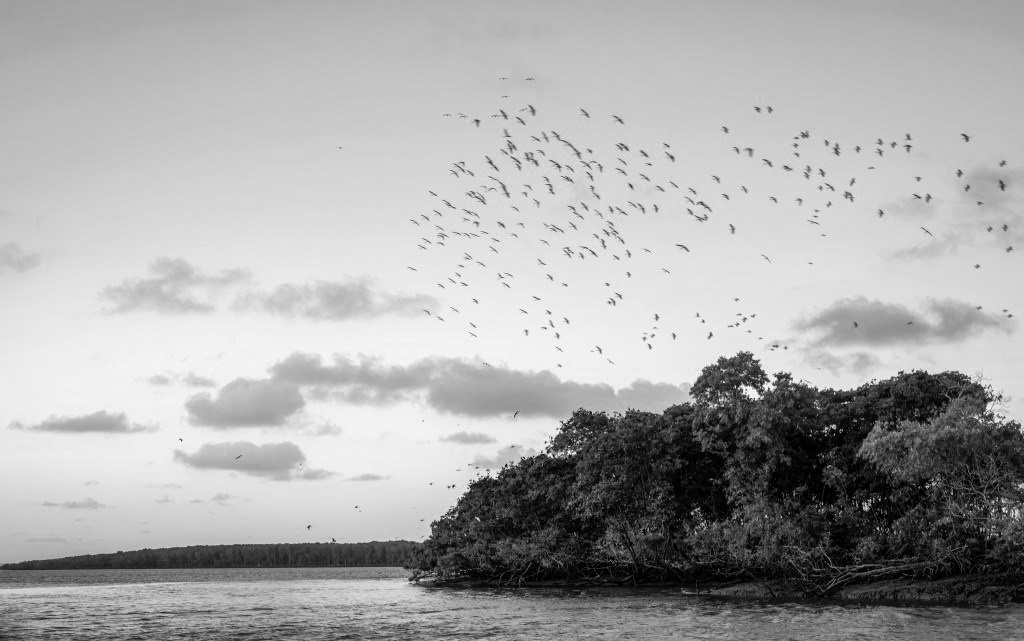

In [18]:
img1

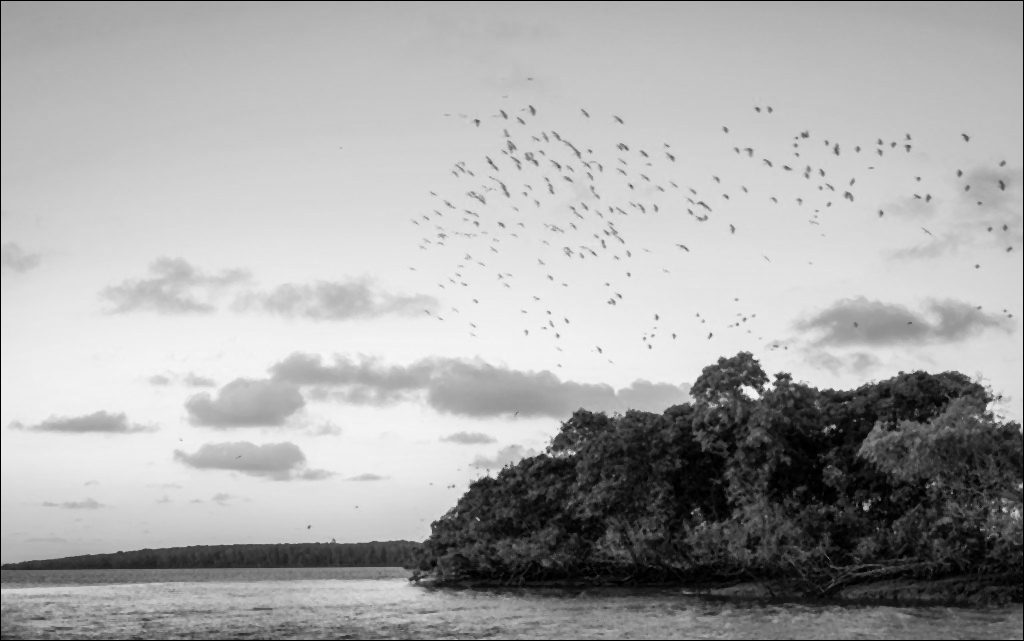

In [20]:
suavizar3(img1, "02.filtro/suavizar/results/New_Suavizar3_(1).jpg")

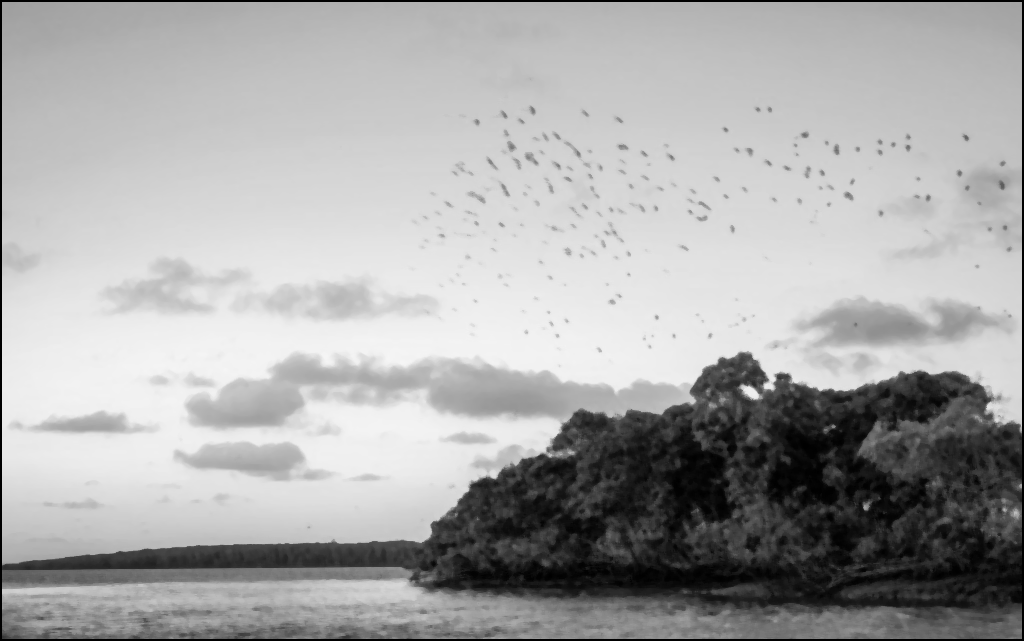

In [21]:
suavizar5(img1, "02.filtro/suavizar/results/New_Suavizar_5(1).jpg")

## Imagem 2

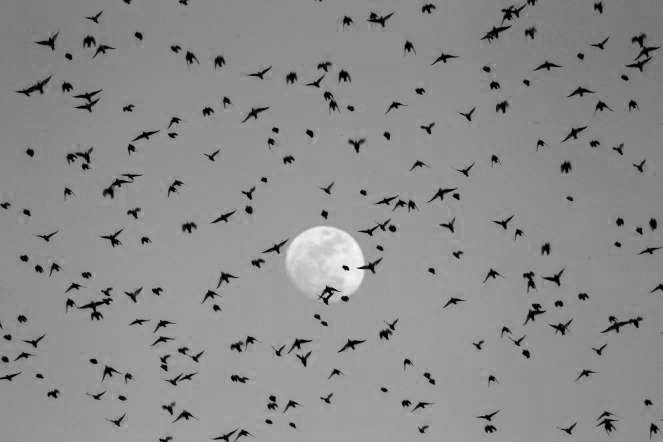

In [22]:
img2

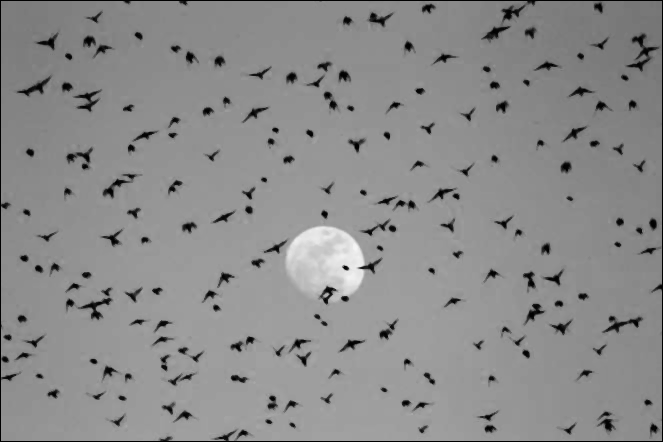

In [23]:
suavizar3(img2, "02.filtro/suavizar/results/New_Suavizar_3(2).jpg")

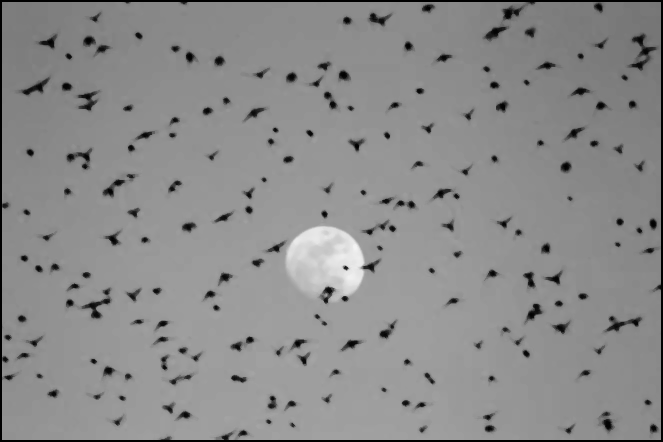

In [24]:
suavizar5(img2, "02.filtro/suavizar/results/New_Suavizar_5(2).jpg")

## Open Image Aguçar

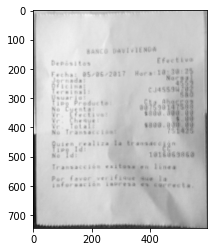

In [16]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('02.filtro/agucar/agucar_(1).jpg')
plt.imshow(image)

## Método Convolution 2D

In [2]:
def convolve2d(image, kernel):
    # get the image dimensions
    # To start, we must gather the x and y size of the image and kernel
    KernelShape = kernel.shape[0]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # apply the size formula for each output dimension
    # n1 = Number of input features
    # n2 = Number of output features
    xOutput = xImgShape - KernelShape + 1
    yOutput = yImgShape - KernelShape + 1

    output = np.zeros((xOutput, yOutput))

    for y in range(xOutput):
        for x in range(yOutput):
            # get the current pixel
            currentPixel = image[y:y+KernelShape, x:x+KernelShape]

            # apply the formula for convolution
            output[y, x] = np.sum(kernel * currentPixel)

            # Original code
            # output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
    return output

## Agucar_(1).jpg


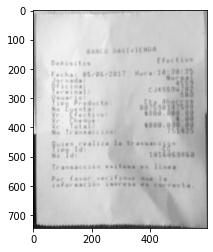

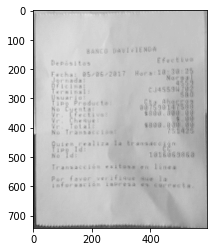

In [3]:
sharp = np.array([[0, -1 , 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

# Original image
image = cv2.imread('02.filtro/agucar/agucar_(1).jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.show()

# Sharpening image
sharpen = convolve2d(image, sharp)
plt.imshow(sharpen, cmap='gray')
plt.show()

save = Image.fromarray(sharpen).convert("L")
save = save.save("02.filtro/agucar/results/new_agucar_(1).jpg", quality=95)


## Agucar_(2).jpg

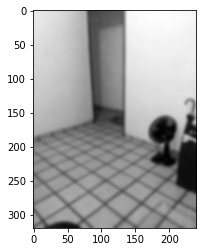

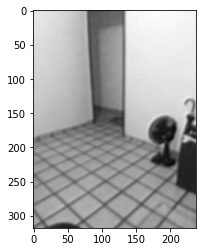

In [8]:
sharp = np.array([[0, -1 , 0],
                    [-1, 6, -1],
                    [0, -1, -1]])

# Original image
image = cv2.imread('02.filtro/agucar/agucar_(2).jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.show()

# Sharpening image
sharpen = convolve2d(image, sharp)
plt.imshow(sharpen, cmap='gray')
plt.show()

save = Image.fromarray(sharpen).convert("L")
save = save.save("02.filtro/agucar/results/new_agucar_(2).jpg", quality=95)

In [112]:
# Teste de iteração

# def convolver(image, kernel, iterations):
#     for i in range(iterations):
#         image = convolve2d(image, kernel)
#     return image

# # Sharpen image
# sharp = np.array([[0, -1, 0],
#                     [-1, 5, -1],
#                     [0, -1, 0]])

# convolver(image, sharp, 2)